# "Grid search"
## File utilizzato per testare il cambiamento di performance del modello HGCN su vari dataset (cora, pubmed, albero bilanciato)

In [13]:
import os
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def print_metrics(log):

    # Regex per estrarre i valori da righe tipo:
    # INFO:root:Epoch: 0005 lr: 0.0005 train_loss: 2.1831 train_roc: 0.7311 train_ap: 0.6287
    re_train = re.compile(
        r"Epoch:\s*(\d+).*?train_loss:\s*([0-9.]+)\s*train_roc:\s*([0-9.]+)\s*train_ap:\s*([0-9.]+)"
    )

    # Regex per righe di validation
    re_val = re.compile(
        r"Epoch:\s*(\d+).*?val_loss:\s*([0-9.]+)\s*val_roc:\s*([0-9.]+)\s*val_ap:\s*([0-9.]+)"
    )

    # Regex valori finali test
    re_test = re.compile(
        r"Test set results:\s*test_loss:\s*([0-9.]+)\s*test_roc:\s*([0-9.]+)\s*test_ap:\s*([0-9.]+)"
    )

    train_loss, train_roc, train_ap = [], [], []
    val_loss, val_roc, val_ap = [], [], []
    test_loss = test_roc = test_ap = 0.0

    with open(log, "r") as f:
        for line in f:
            m = re_train.search(line)
            if m:
                train_loss.append(float(m.group(2)))
                train_roc.append(float(m.group(3)))
                train_ap.append(float(m.group(4)))

            m = re_val.search(line)
            if m:
                val_loss.append(float(m.group(2)))
                val_roc.append(float(m.group(3)))
                val_ap.append(float(m.group(4)))

            m = re_test.search(line)
            if m:
                test_loss = float(m.group(1))
                test_roc  = float(m.group(2))
                test_ap   = float(m.group(3))

    epochs = list(range(1, len(train_loss)+1))

    # ------------ GRAFICO TRAIN LOSS -------------------
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss)
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

    # ------------ GRAFICO TRAIN ROC + AP ---------------
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_roc, label="train_roc")
    plt.plot(epochs, val_roc,  label="val_roc")
    plt.title("Curva ROC")
    plt.xlabel("Epoch")
    plt.ylabel("ROC")
    plt.legend()
    plt.grid()
    plt.show()

    # ------------ GRAFICO VALIDATION ROC + AP ----------
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_ap, label="train_ap")
    plt.plot(epochs, val_ap,  label="val_ap")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Acc")
    plt.legend()
    plt.grid()
    plt.show()

    # ------------ TEST RESULTS -----------------
    print("Test metrics finali:")
    print(f"  test_loss = {test_loss}")
    print(f"  test_roc  = {test_roc}")
    print(f"  test_ap   = {test_ap}")
    return train_roc, train_ap, val_roc, val_ap, test_roc, test_ap

stamp = ["(lr 0.0005, dim2)", "lr 0.00005", "lr 0.001", "dropout 0.4", "dropout 0.6", "dim 4", "dim 8", "dim 16", "layers 3", "c None","wd 0.0005", "wd 0.001"]
stamp2 = ["lr 0.00005", "lr 0.001", "dropout 0.4", "dropout 0.6", "dim 4", "dim 8", "dim 16", "layers 3", "c None","wd 0.0005", "wd 0.001", "base"]
stamp3 = ["(lr 0.001, dim2)", "lr 0.00005", "lr 0.0005", "lr 0.005", "lr 0.01", "lr 0.05", "lr 0.09", "lr 0.12", "dim3", "dim4", "dim8", "dim10", "dim16", "dim20"]#, "(lr 0.09, dim20)"]
stamp4 = ["(lr 0.001, dim2)", "lr 0.00005", "lr 0.0005", "lr 0.005", "lr 0.01", "dim3", "dim4", "dim8", "dim10", "dim16", "dim20"]
special = ["(lr 0.001, dim2)", "lr 0.00005", "lr 0.0005", "lr 0.005", "lr 0.01", "lr 0.05", "lr 0.09", "dim3", "dim4", "dim8", "dim10", "dim16", "dim20", "(lr 0.01, dim20)"]
random = ["(lr 0.001, dim2)", "lr 0.00005", "lr 0.0005", "lr 0.005", "lr 0.01", "dim3", "dim4", "dim8", "dim10", "dim16", "dim20", "(lr 0.01, dim20)"]

## Usando HGCN su Cora (2708 nodi, 5278 archi)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = "CORA"
root_dir = "ambiente/gridsearch/2025_11_25"

all_train_roc, all_train_ap = [], []
all_val_roc, all_val_ap = [], []
all_test_roc, all_test_ap = [], []

for i in range(len(stamp3)):  # cartelle da 0 a 10
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", stamp3[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc.append(out[0])
    all_train_ap.append(out[1])
    all_val_roc.append(out[2])
    all_val_ap.append(out[3])
    all_test_roc.append(out[4])
    all_test_ap.append(out[5])

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 1:
        # Caso array 1D
        plt.plot(embeddings)
        plt.title(f"embeddings.npy nella cartella {i} (1D)")
    elif len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (shape {embeddings.shape})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

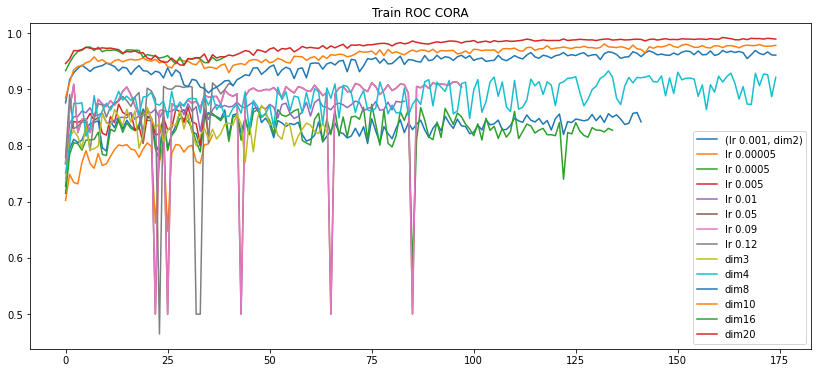

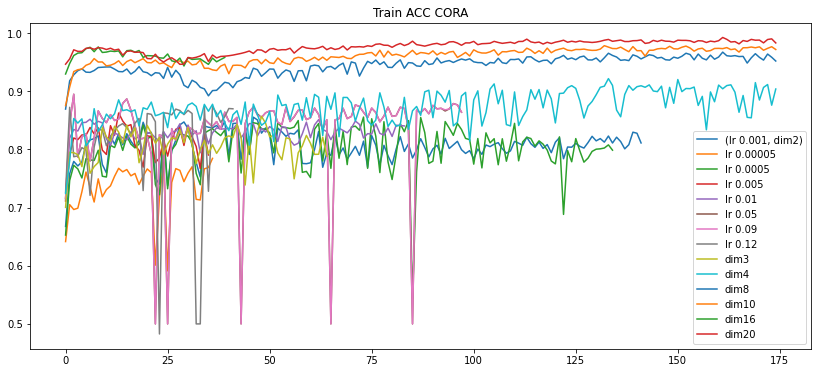

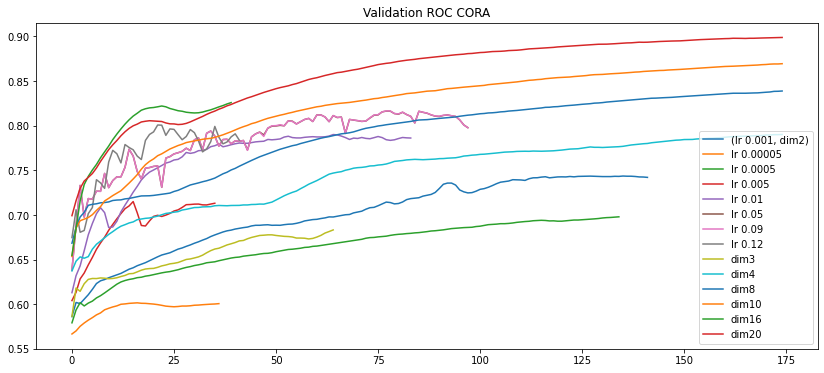

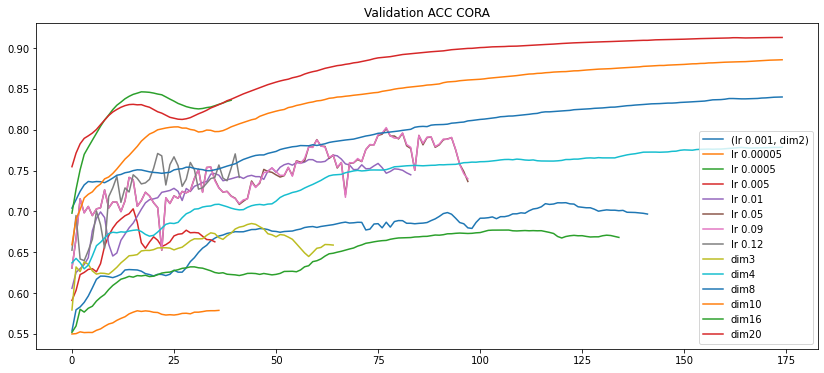

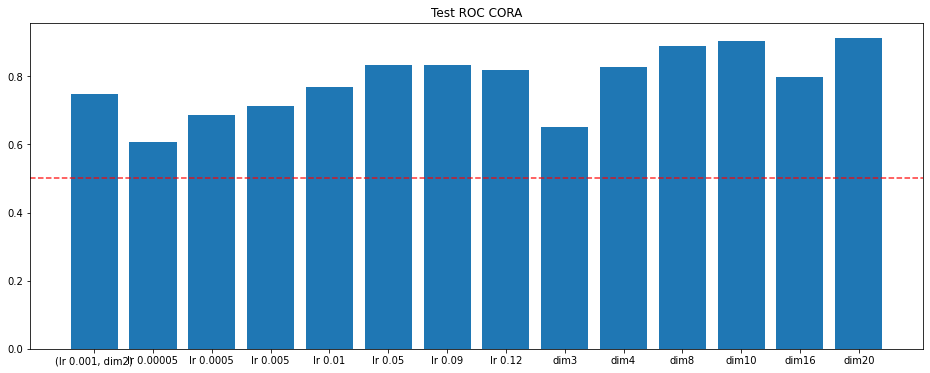

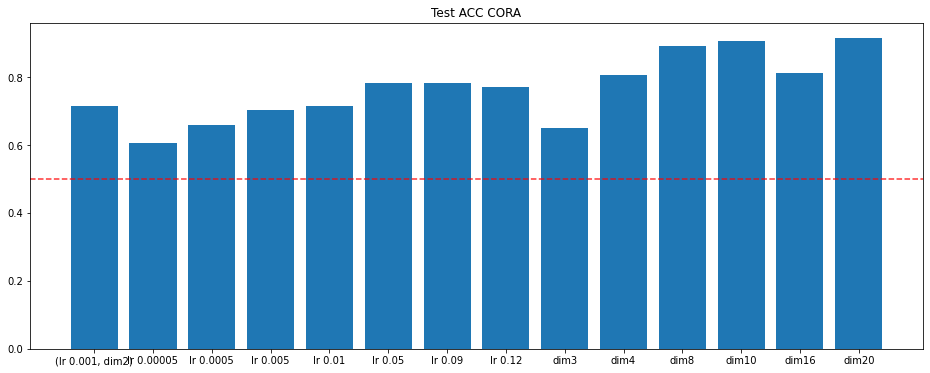

In [3]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc, all_train_ap, all_val_roc, all_val_ap]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j] + " " + dataset)
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=stamp3[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC" + " " + dataset)
plt.bar(stamp3, all_test_roc)
plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC" + " " + dataset)
plt.bar(stamp3, all_test_ap)
plt.show()

## Conclusioni Cora: lr incisivo se alto e dim idem fino a limite

# --------------------------------------------------------------------------------------------------------

## Usando HGCN su PubMed (19717 nodi e 44327 archi, ≈ 3GB)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = "PubMed"
pub = stamp3
pub[-1] = "(lr 0.05, dim20)"
root_dir = "ambiente/gridsearch/2025_11_26_pubmed"

all_train_roc, all_train_ap = [], []
all_val_roc, all_val_ap = [], []
all_test_roc, all_test_ap = [], []

for i in range(len(pub)):  # cartelle da 0 a 10
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", pub[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc.append(out[0])
    all_train_ap.append(out[1])
    all_val_roc.append(out[2])
    all_val_ap.append(out[3])
    all_test_roc.append(out[4])
    all_test_ap.append(out[5])

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 1:
        # Caso array 1D
        plt.plot(embeddings)
        plt.title(f"embeddings.npy nella cartella {i} (1D)")
    elif len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (shape {embeddings.shape})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

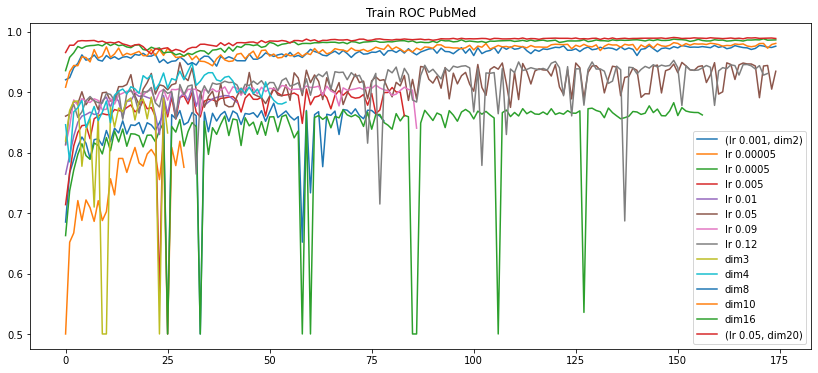

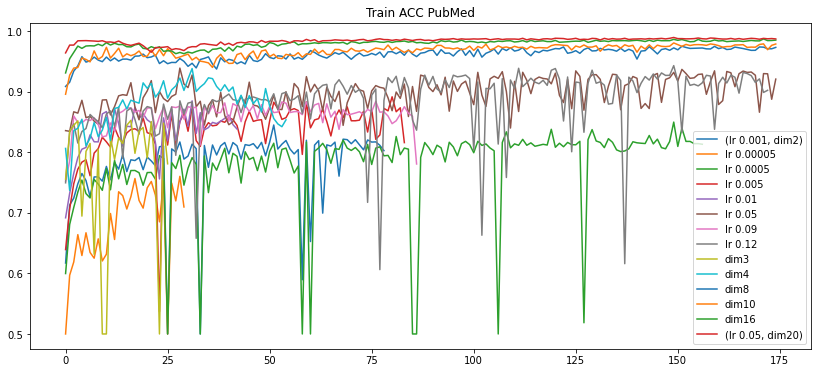

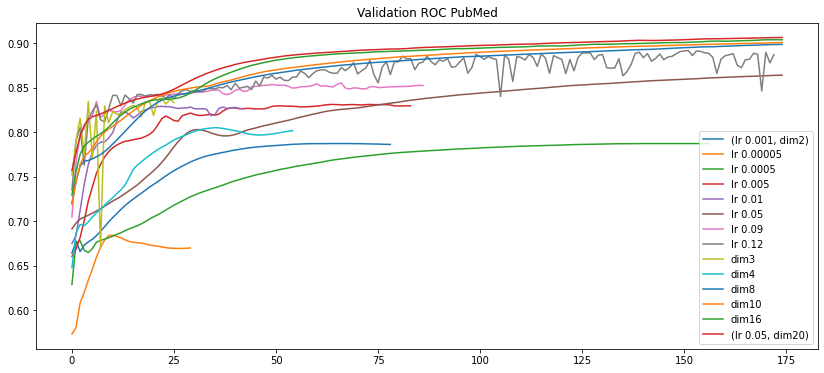

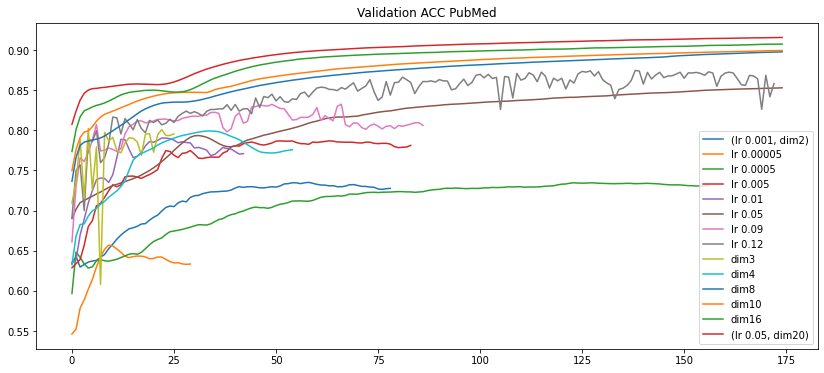

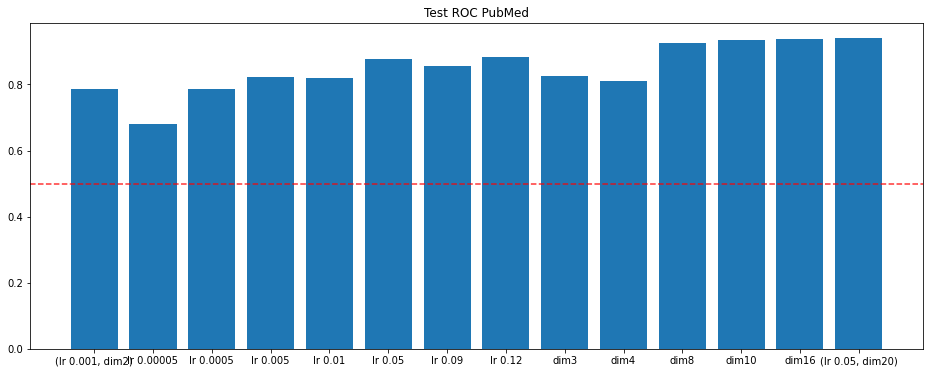

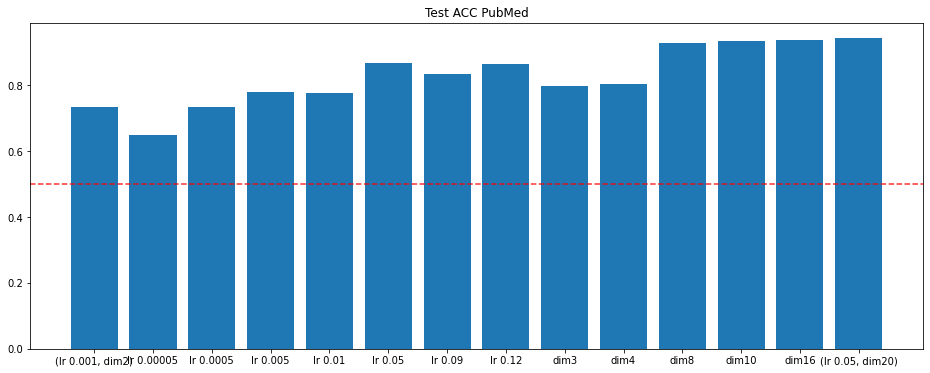

In [53]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc, all_train_ap, all_val_roc, all_val_ap]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j]+ " " + dataset)
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=pub[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC"+ " " + dataset)
plt.bar(pub, all_test_roc)
plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC"+ " " + dataset)
plt.bar(pub, all_test_ap)
plt.show()

## Conclusioni PubMed: lr incisivo se alto e dim idem fino a limite

# --------------------------------------------------------------------------------------------------------

## Usando HGCN disease_lp

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = "Disease_LP della libreria"
root_dir = "ambiente/gridsearch/2025_11_26_disease"

all_train_roc, all_train_ap = [], []
all_val_roc, all_val_ap = [], []
all_test_roc, all_test_ap = [], []

for i in range(len(stamp4)):  # cartelle da 0 a 10
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", stamp4[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc.append(out[0])
    all_train_ap.append(out[1])
    all_val_roc.append(out[2])
    all_val_ap.append(out[3])
    o4, o5 = out[4], out[5]
    if o4 == "None":
        o4 = 0.0
    if o5 == "None":
        o5 = 0.0    
    all_test_roc.append(o4)
    all_test_ap.append(o5)

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 1:
        # Caso array 1D
        plt.plot(embeddings)
        plt.title(f"embeddings.npy nella cartella {i} (1D)")
    elif len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (shape {embeddings.shape})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

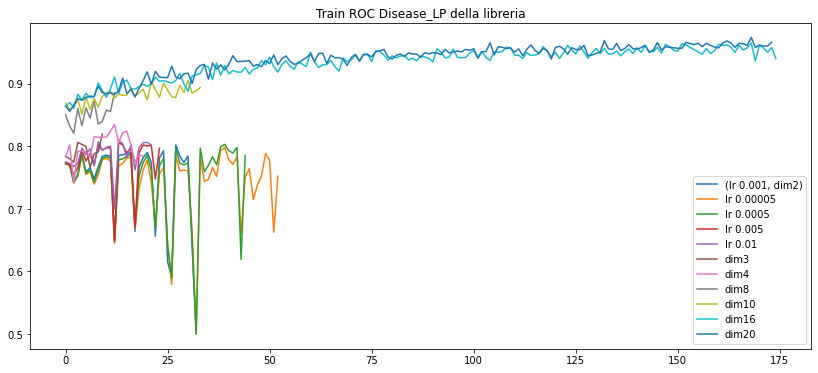

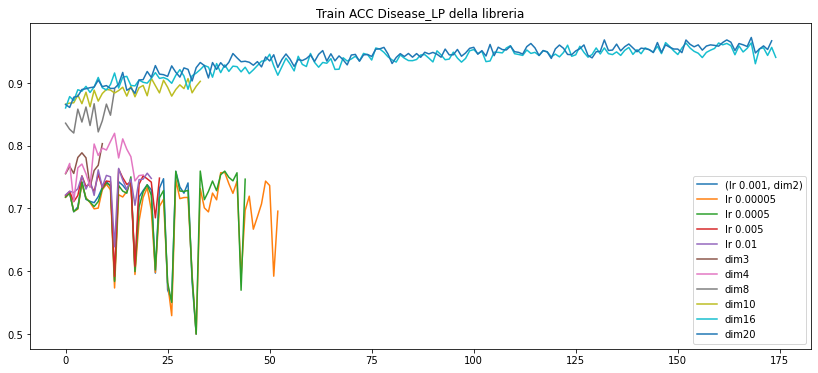

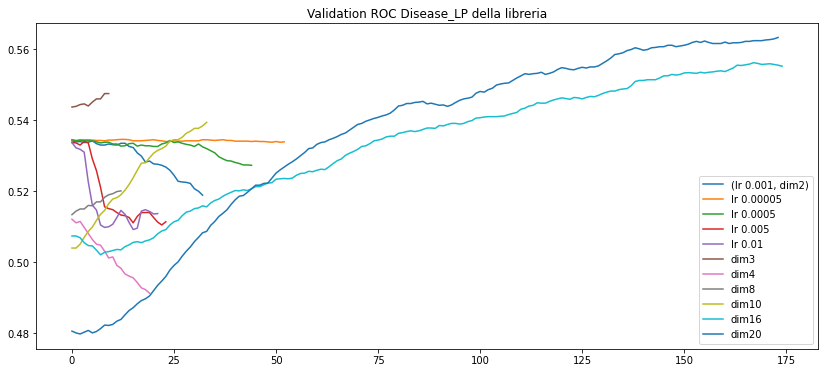

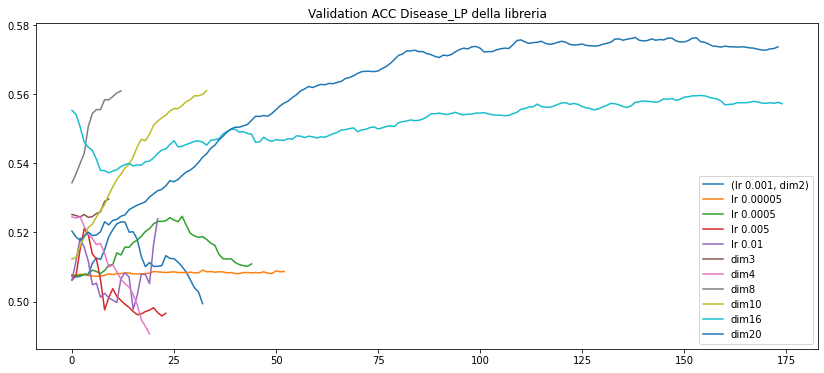

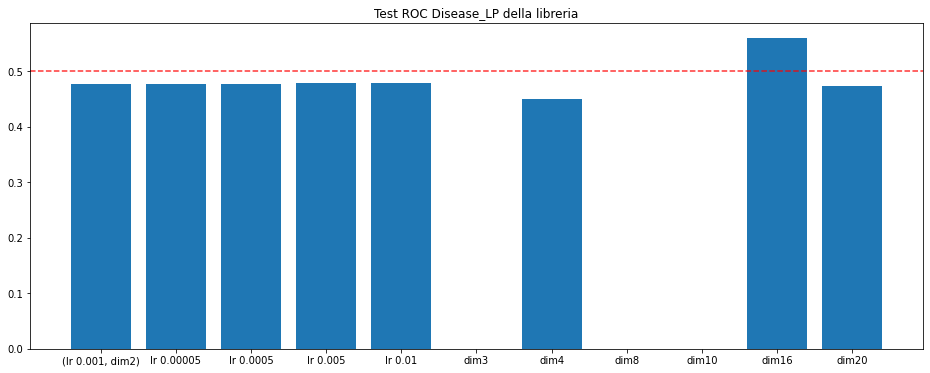

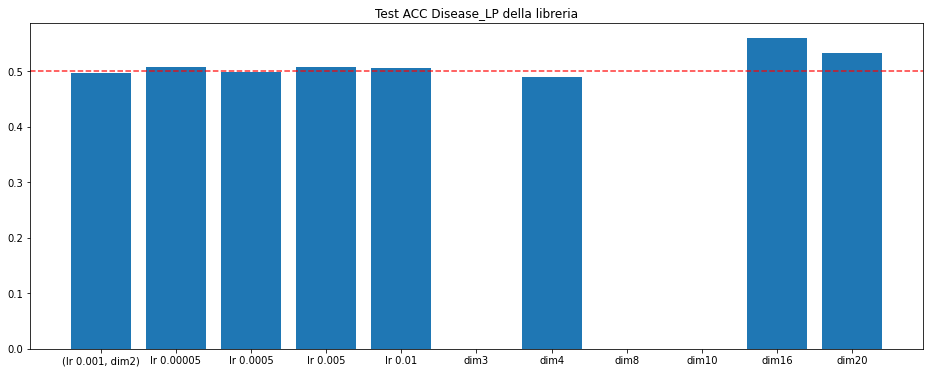

In [38]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc, all_train_ap, all_val_roc, all_val_ap]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j]+ " " + dataset)
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=stamp4[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC"+ " " + dataset)
plt.bar(stamp4, all_test_roc)
plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC"+ " " + dataset)
plt.bar(stamp4, all_test_ap)
plt.show()

## Conclusioni disease_lp: impossibile apprendere

# --------------------------------------------------------------------------------------------------------

## Usando HGCN albero artificiale (balanced tree con r=3 e p=6, 1093 nodi e 1092 archi)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = "Albero artificiale"
root_dir = "ambiente/gridsearch/2025_11_26_balanced_tree"

all_train_roc, all_train_ap = [], []
all_val_roc, all_val_ap = [], []
all_test_roc, all_test_ap = [], []

for i in range(len(special)):  # cartelle da 0 a 10
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", special[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc.append(out[0])
    all_train_ap.append(out[1])
    all_val_roc.append(out[2])
    all_val_ap.append(out[3])
    o4, o5 = out[4], out[5]
    if o4 == "None":
        o4 = 0.0
    if o5 == "None":
        o5 = 0.0    
    all_test_roc.append(o4)
    all_test_ap.append(o5)

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 1:
        # Caso array 1D
        plt.plot(embeddings)
        plt.title(f"embeddings.npy nella cartella {i} (1D)")
    elif len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (shape {embeddings.shape})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

lr = 0.001, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 (lr 0.001, dim2) 


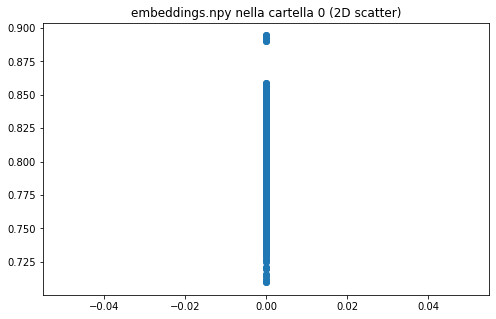

-------------------------------------------------------------------------------------------------------------------
lr = 5e-05, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 lr 0.00005 


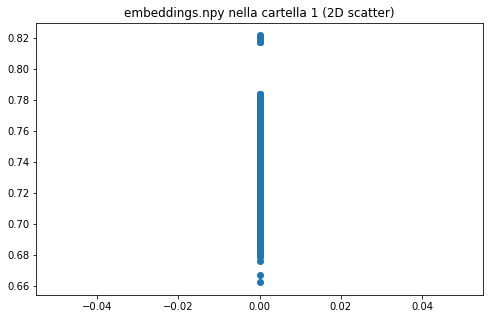

-------------------------------------------------------------------------------------------------------------------
lr = 0.0005, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 lr 0.0005 


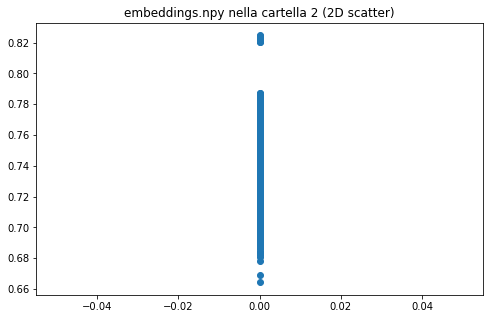

-------------------------------------------------------------------------------------------------------------------
lr = 0.005, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 lr 0.005 


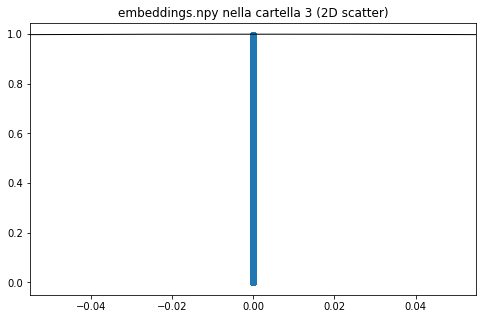

-------------------------------------------------------------------------------------------------------------------
lr = 0.01, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 lr 0.01 


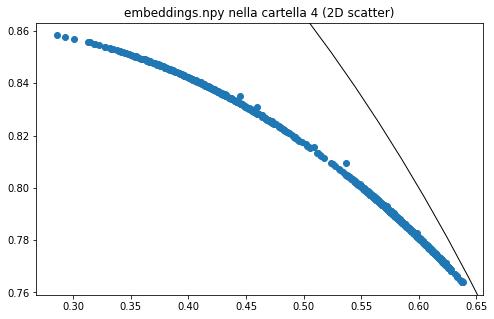

-------------------------------------------------------------------------------------------------------------------
lr = 0.05, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 lr 0.05 


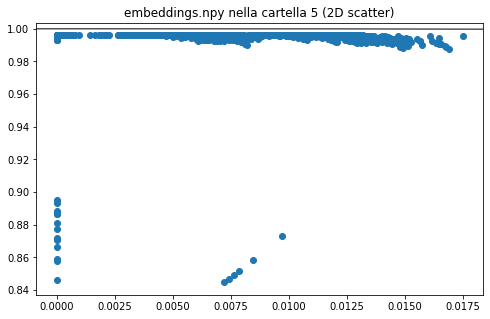

-------------------------------------------------------------------------------------------------------------------
lr = 0.09, model = HGCN, dropout = 0.2, dim = 2, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 lr 0.09 


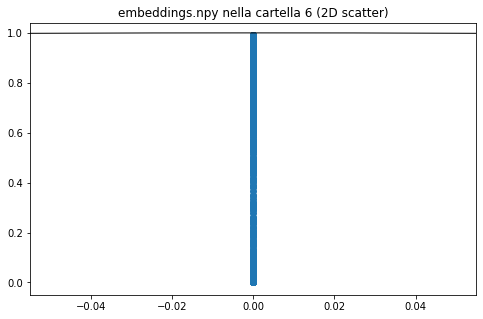

-------------------------------------------------------------------------------------------------------------------
lr = 0.001, model = HGCN, dropout = 0.2, dim = 3, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 dim3 


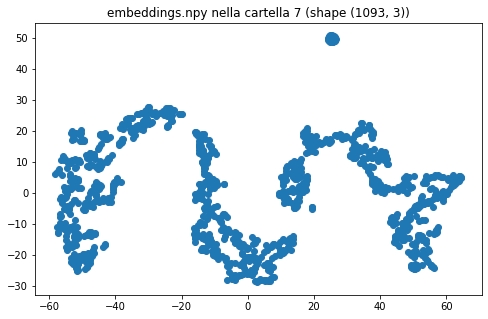

-------------------------------------------------------------------------------------------------------------------
lr = 0.001, model = HGCN, dropout = 0.2, dim = 4, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 dim4 


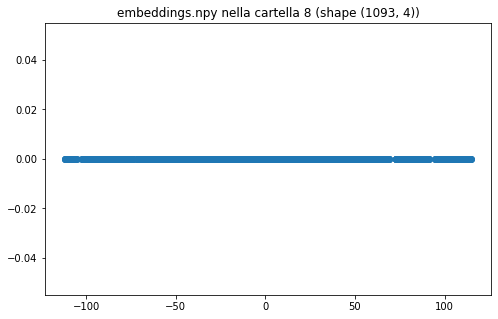

-------------------------------------------------------------------------------------------------------------------
lr = 0.001, model = HGCN, dropout = 0.2, dim = 8, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 dim8 


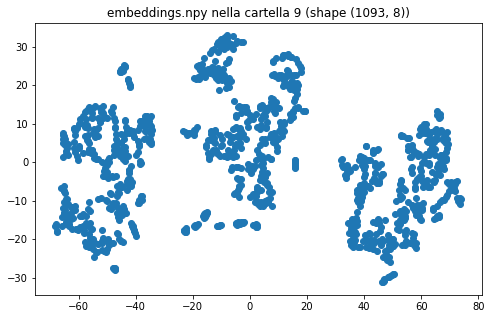

-------------------------------------------------------------------------------------------------------------------
lr = 0.001, model = HGCN, dropout = 0.2, dim = 10, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 dim10 


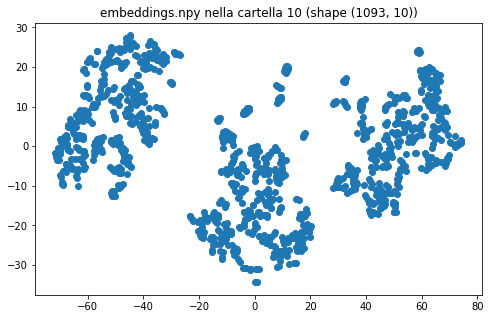

-------------------------------------------------------------------------------------------------------------------
lr = 0.001, model = HGCN, dropout = 0.2, dim = 16, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 dim16 


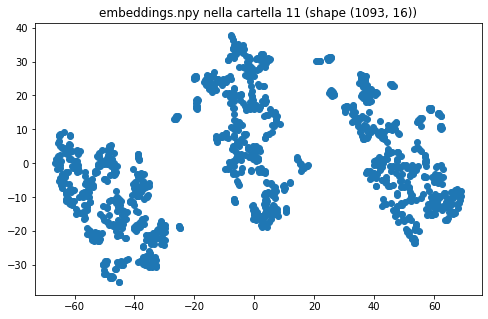

-------------------------------------------------------------------------------------------------------------------
lr = 0.001, model = HGCN, dropout = 0.2, dim = 20, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 dim20 


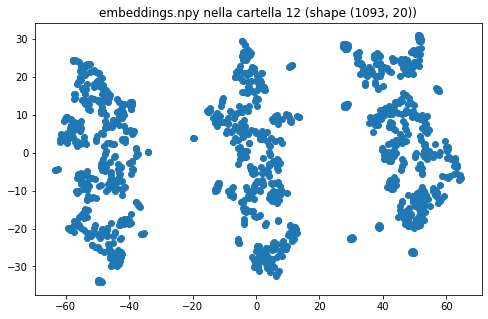

-------------------------------------------------------------------------------------------------------------------
lr = 0.01, model = HGCN, dropout = 0.2, dim = 20, num-layers = 2, c = 1.0, optimizer= RiemannianAdam, weight_decay = 0.0005, manifold = PoincareBall, epochs = 5000
 (lr 0.01, dim20) 


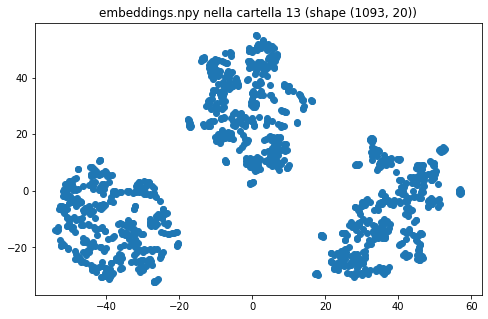

-------------------------------------------------------------------------------------------------------------------


In [6]:
# EMBEDDINGS CON TSNE INVECE DI PCA PER CASI DI DIM > 2

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

dataset = "Albero artificiale"
root_dir = "ambiente/2025_11_26_balanced_tree"


for i in range(len(special)):  # cartelle da 0 a 10
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", special[i], "\033[0m")
    
    embeddings = np.load(embeddings_path)

    # Plot
    plt.figure(figsize=(8,5))
    if len(embeddings.shape) == 1:
        # Caso array 1D
        plt.plot(embeddings)
        plt.title(f"embeddings.npy nella cartella {i} (1D)")
    elif len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        circle = plt.Circle((0,0), 1, color='black', fill=False)
        plt.gca().add_artist(circle)
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (2D scatter)")
    else:
        tsne = TSNE(n_components=2, random_state=55, perplexity=20)
        embeddings_pca = tsne.fit_transform(np.array(embeddings))
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"embeddings.npy nella cartella {i} (shape {embeddings.shape})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

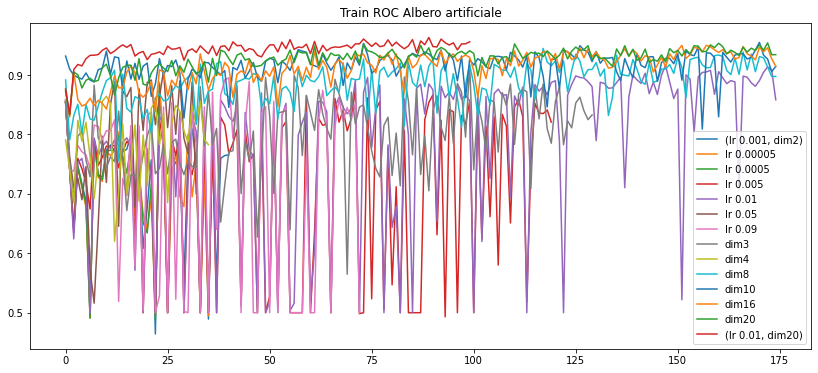

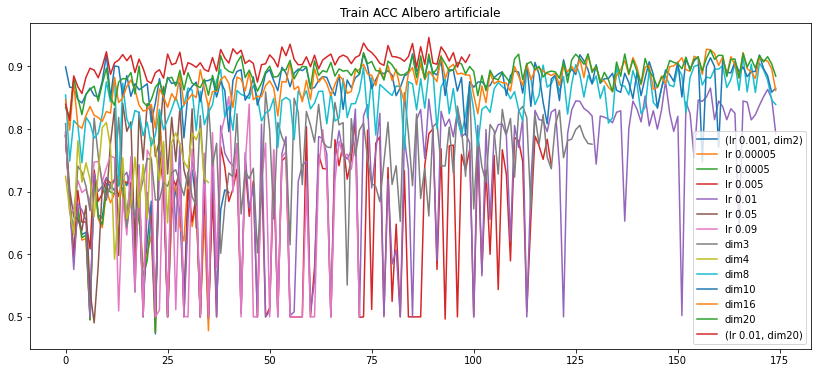

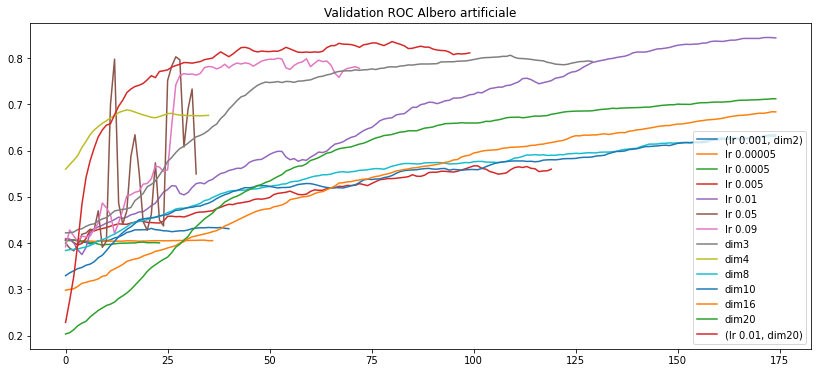

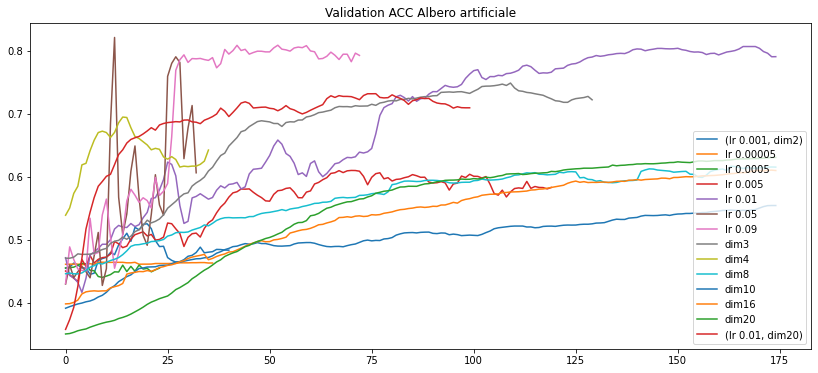

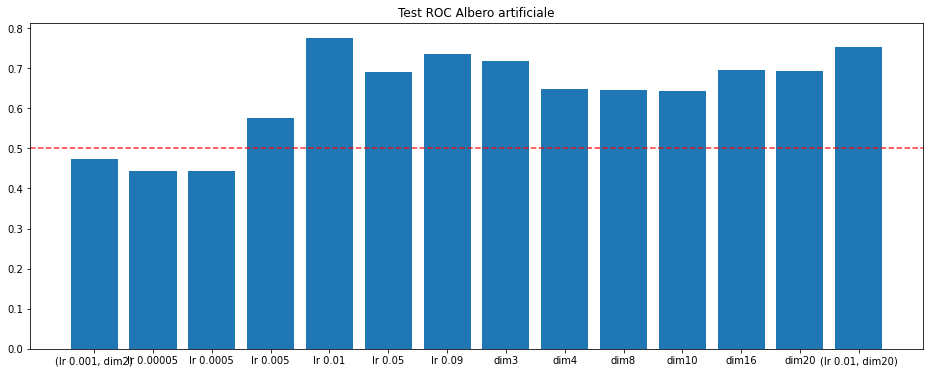

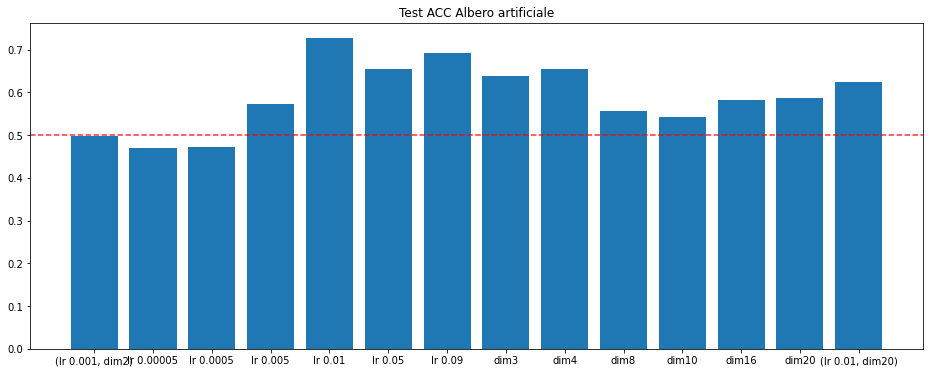

In [11]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc, all_train_ap, all_val_roc, all_val_ap]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j]+ " " + dataset)
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=special[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC"+ " " + dataset)
plt.bar(special, all_test_roc)
plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC"+ " " + dataset)
plt.bar(special, all_test_ap)
plt.show()

## Conclusioni dataset albero bilanciato: lr molto incisivo, dim meglio se bassa

# --------------------------------------------------------------------------------------------------------

## Usando HGCN albero artificiale (balanced tree con r=3 e p=6, 1092 nodi e 1093 archi)
### E 1000 feature randomiche

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dataset = "Albero artificiale (random)"
root_dir = "ambiente/gridsearch/2025_11_27"

all_train_roc, all_train_ap = [], []
all_val_roc, all_val_ap = [], []
all_test_roc, all_test_ap = [], []

for i in range(len(random)):  # cartelle da 0 a 10
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", random[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc.append(out[0])
    all_train_ap.append(out[1])
    all_val_roc.append(out[2])
    all_val_ap.append(out[3])
    o4, o5 = out[4], out[5]
    if o4 == "None":
        o4 = 0.0
    if o5 == "None":
        o5 = 0.0    
    all_test_roc.append(o4)
    all_test_ap.append(o5)

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"Embeddings (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"Embeddings con riduzione tramite PCA (dim originale: {embeddings.shape[1]})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

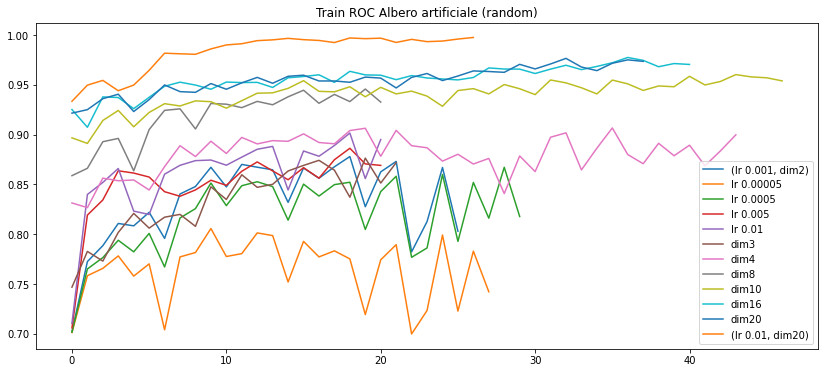

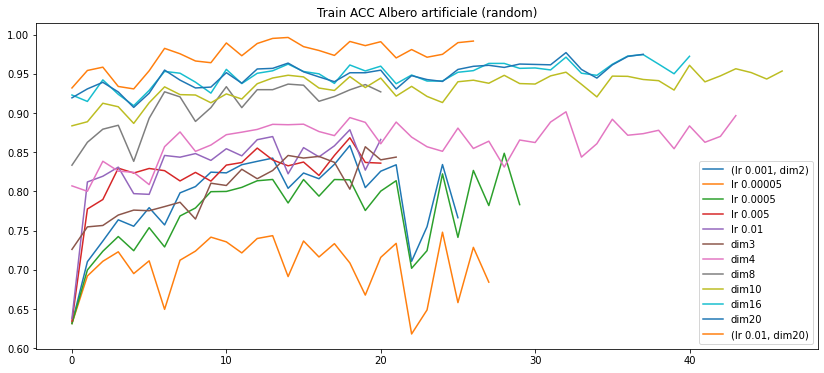

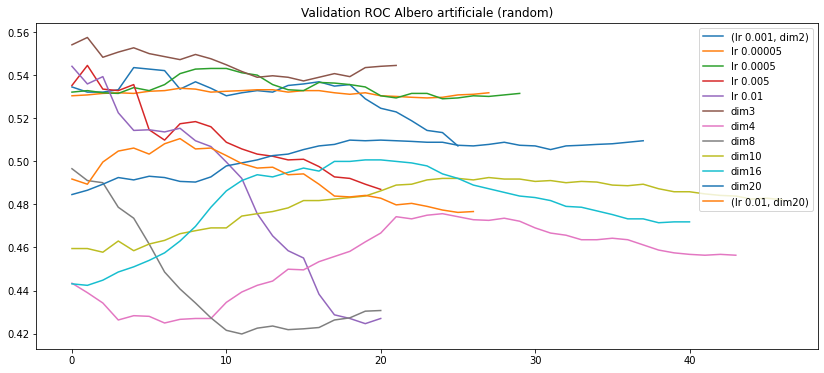

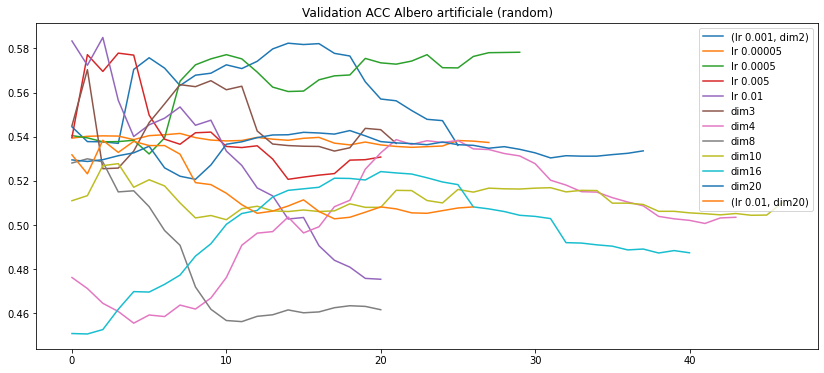

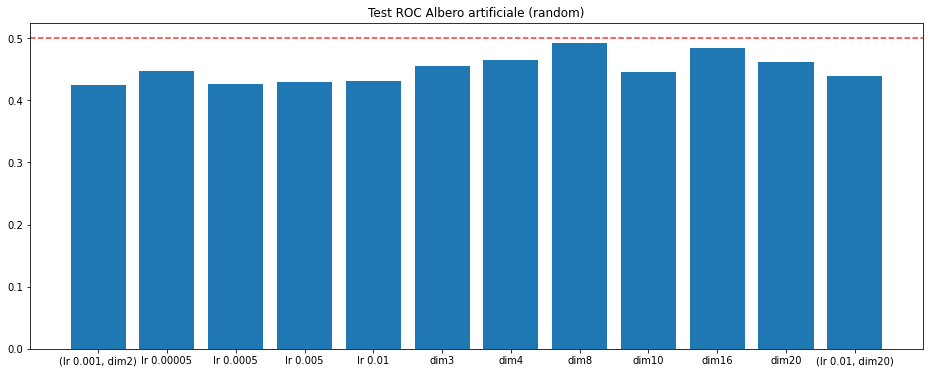

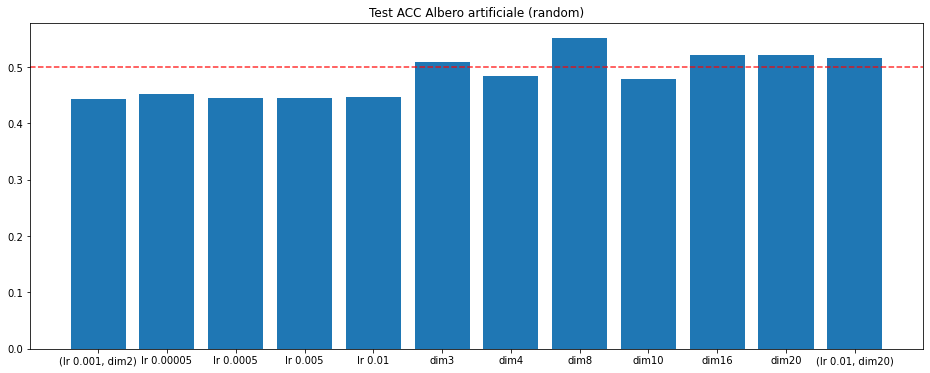

In [9]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc, all_train_ap, all_val_roc, all_val_ap]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j]+ " " + dataset)
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=random[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC"+ " " + dataset)
plt.bar(random, all_test_roc)
plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC"+ " " + dataset)
plt.bar(random, all_test_ap)
plt.show()

# --------------------------------------------------------------------------------------------------------

# Primi test iniziali su scelta parametri incisivi

## Utilizzando come modello HGCN (no limiti di epochs)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = "ambiente/gridsearch/2025_11_20"
dataset = "Cora"

all_train_roc, all_train_ap = [], []
all_val_roc, all_val_ap = [], []
all_test_roc, all_test_ap = [], []

for i in range(12):  # cartelle da 0 a 11
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", stamp[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc.append(out[0])
    all_train_ap.append(out[1])
    all_val_roc.append(out[2])
    all_val_ap.append(out[3])
    all_test_roc.append(out[4])
    all_test_ap.append(out[5])

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"Embeddings (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"Embeddings con riduzione tramite PCA (dim originale: {embeddings.shape[1]})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

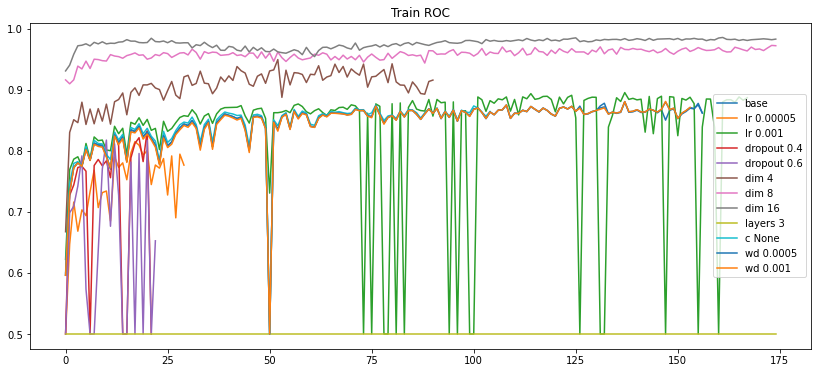

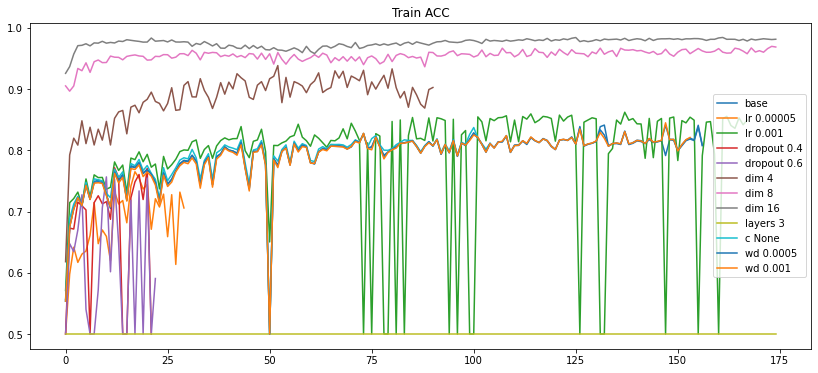

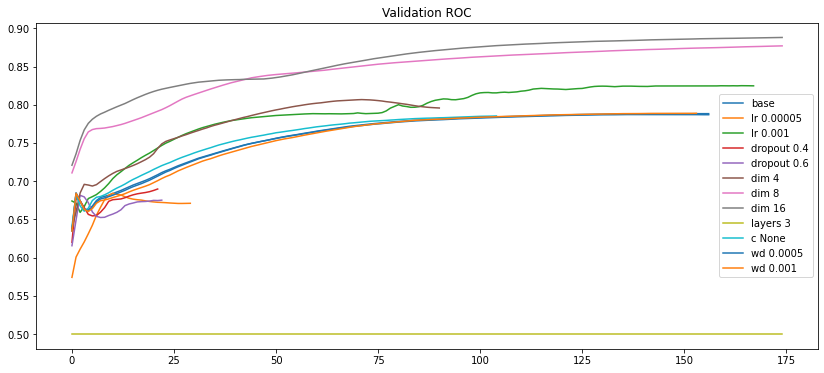

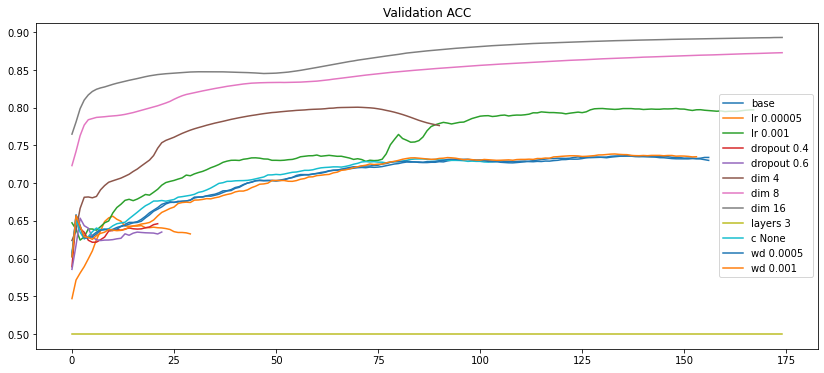

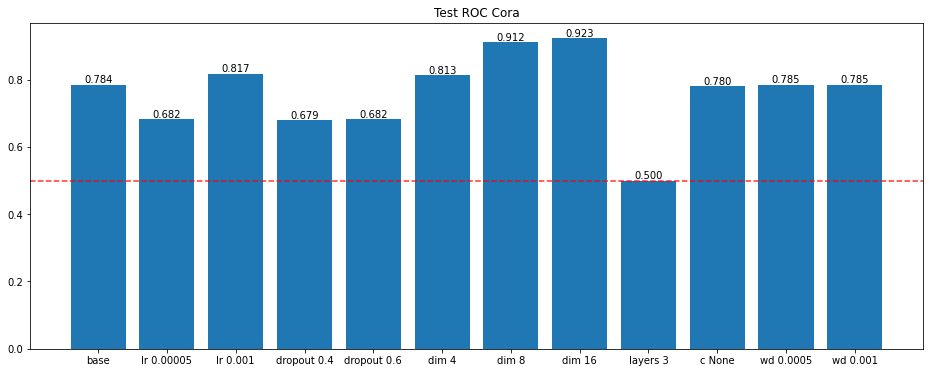

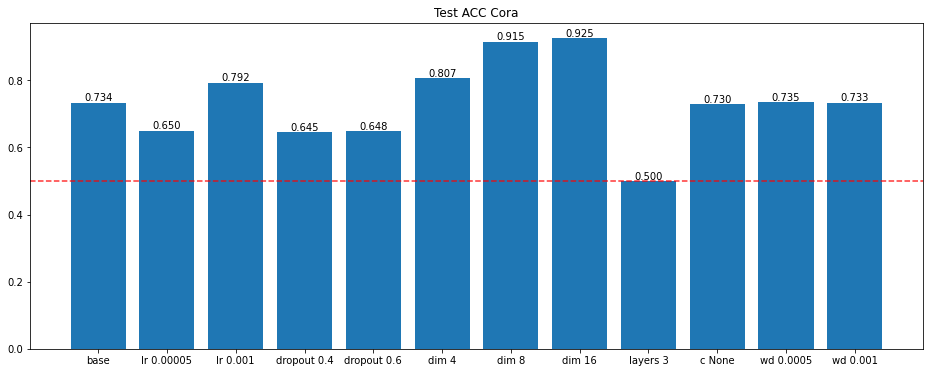

In [4]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc, all_train_ap, all_val_roc, all_val_ap]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j])
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=stamp[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC" + " " + dataset)

bars = plt.bar(stamp, all_test_roc)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # posizione x
        height,                              # posizione y
        f"{height:.3f}",                     # testo (3 decimali)
        ha='center', va='bottom', fontsize=10
    )

plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC" + " " + dataset)

bars = plt.bar(stamp, all_test_ap)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.3f}",
        ha='center', va='bottom', fontsize=10
    )

plt.show()

## Test su PubMed

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = "ambiente/gridsearch/2025_11_22"
dataset = "PubMed"

all_train_roc2, all_train_ap2 = [], []
all_val_roc2, all_val_ap2 = [], []
all_test_roc2, all_test_ap2 = [], []

for i in range(12):  # cartelle da 0 a 11
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", stamp[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc2.append(out[0])
    all_train_ap2.append(out[1])
    all_val_roc2.append(out[2])
    all_val_ap2.append(out[3])
    all_test_roc2.append(out[4])
    all_test_ap2.append(out[5])

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"Embeddings (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"Embeddings con riduzione tramite PCA (dim originale: {embeddings.shape[1]})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

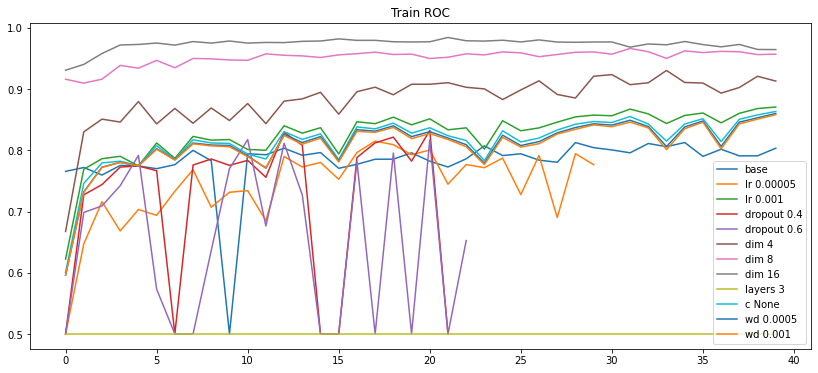

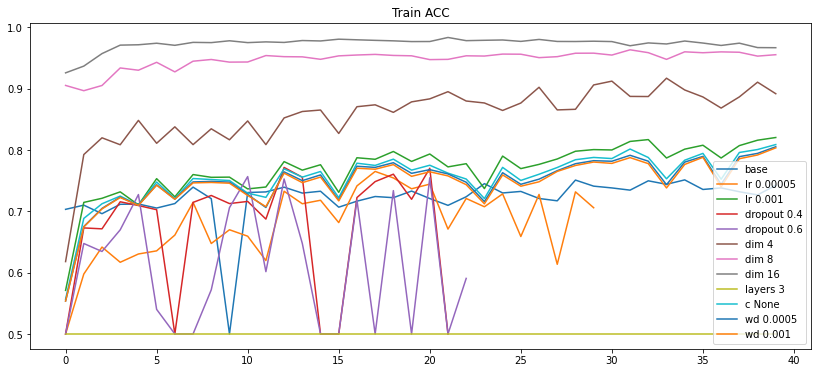

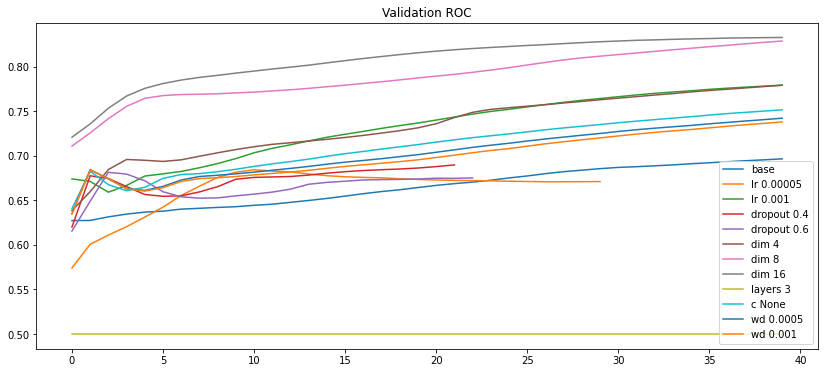

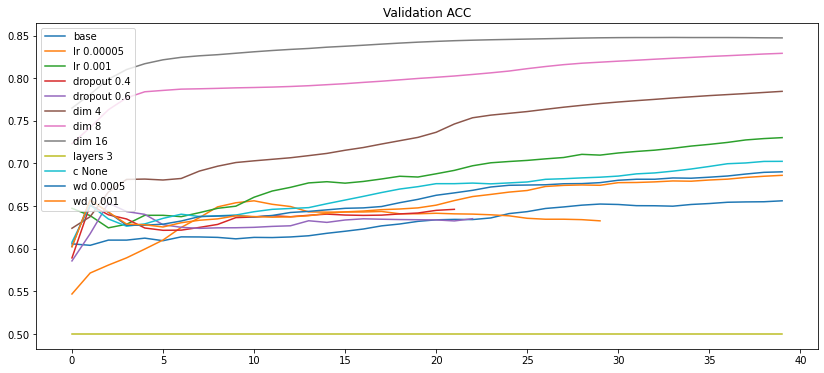

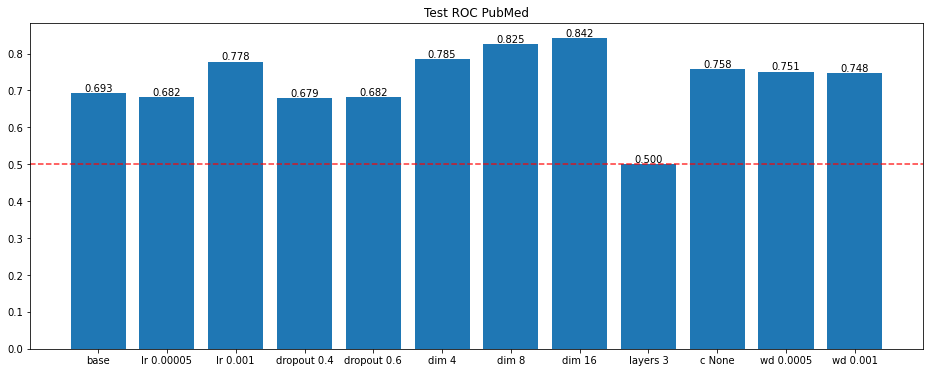

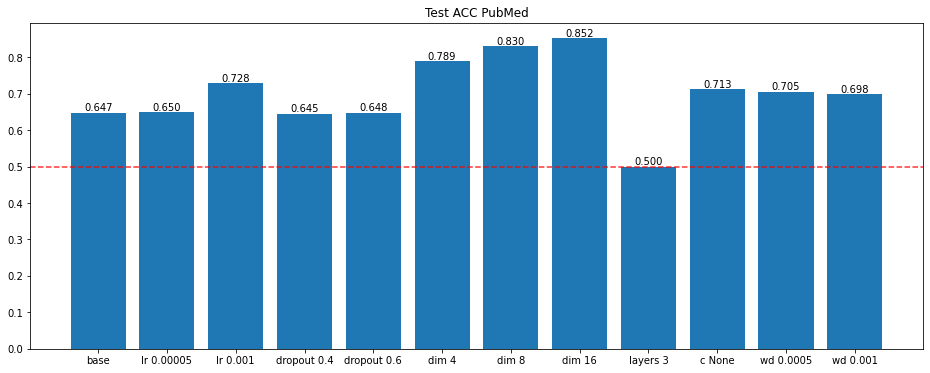

In [6]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc2, all_train_ap2, all_val_roc2, all_val_ap2]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j])
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=stamp[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC" + " " + dataset)

bars = plt.bar(stamp, all_test_roc2)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # posizione x
        height,                              # posizione y
        f"{height:.3f}",                     # testo (3 decimali)
        ha='center', va='bottom', fontsize=10
    )

plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC" + " " + dataset)

bars = plt.bar(stamp, all_test_ap2)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.3f}",
        ha='center', va='bottom', fontsize=10
    )

plt.show()

## Test su dataset artificiale (121 nodi, albero con 3 sottofigli per altezza 4)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = "ambiente/gridsearch/2025_11_24_mio"
dataset = "balanced tree con r=3 e h=4"

all_train_roc3, all_train_ap3 = [], []
all_val_roc3, all_val_ap3 = [], []
all_test_roc3, all_test_ap3 = [], []

for i in range(12):  # cartelle da 0 a 11
    folder_path = os.path.join(root_dir, str(i))
    embeddings_path = os.path.join(folder_path, "embeddings.npy")
    log = os.path.join(folder_path, "log.txt")

    if not os.path.exists(folder_path):
        print(f"Cartella {folder_path} non trovata, salto.")
        continue

    if not os.path.isfile(embeddings_path):
        print(f"File embeddings.npy non trovato in {folder_path}\n")
        continue
    
    with open(log, "r") as f:
        cmd = f.readline().strip()
    
    print(cmd)
    print("\033[1m", stamp[i], "\033[0m")
    out = print_metrics(log)
    
    embeddings = np.load(embeddings_path)

    all_train_roc3.append(out[0])
    all_train_ap3.append(out[1])
    all_val_roc3.append(out[2])
    all_val_ap3.append(out[3])
    all_test_roc3.append(out[4])
    all_test_ap3.append(out[5])

    # Plot
    plt.figure(figsize=(8,5))
    circle = plt.Circle((0,0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    if len(embeddings.shape) == 2 and embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
        plt.title(f"Embeddings (2D scatter)")
    else:
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings)
        
        plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
        plt.title(f"Embeddings con riduzione tramite PCA (dim originale: {embeddings.shape[1]})")

    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

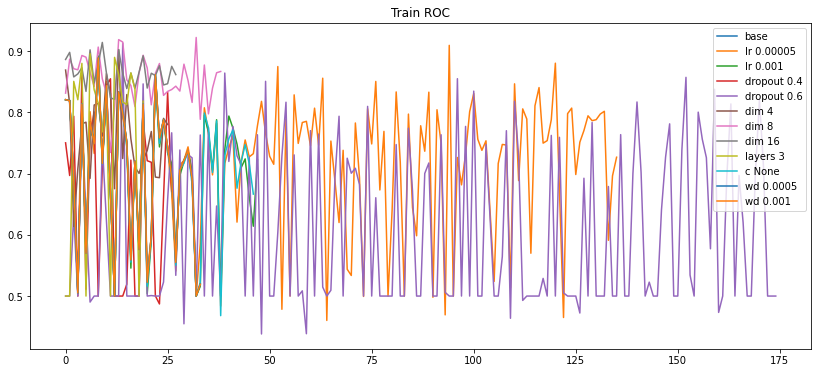

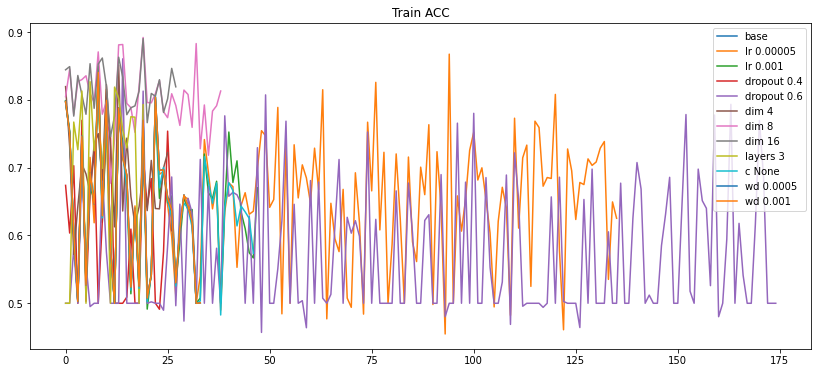

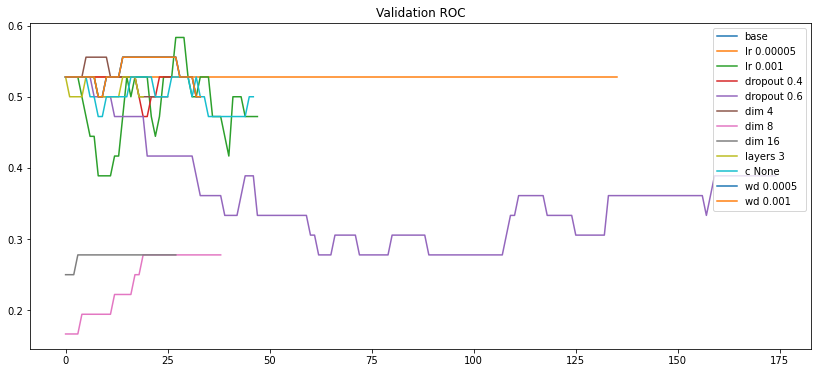

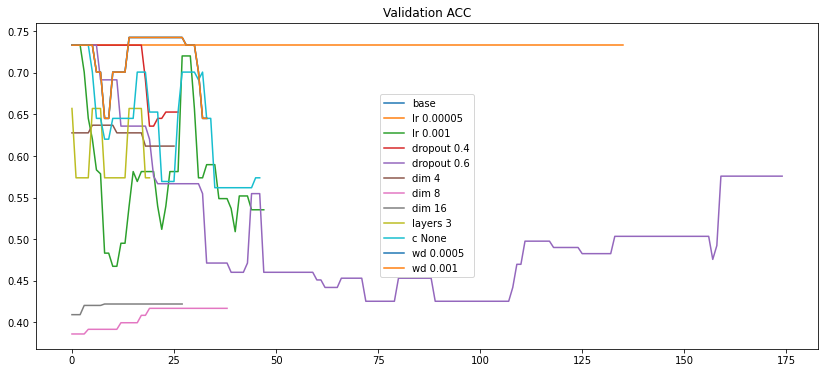

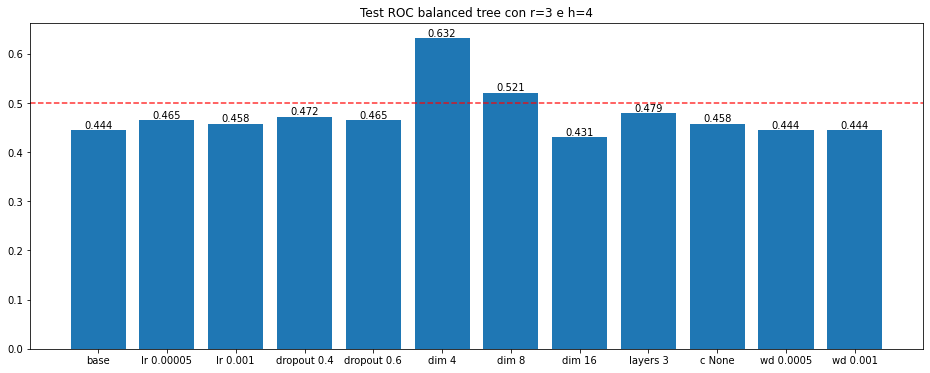

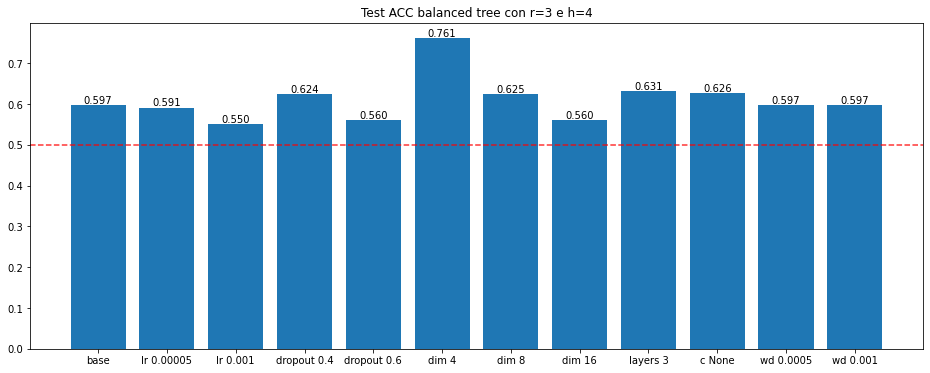

In [11]:
names = ["Train ROC", "Train ACC", "Validation ROC", "Validation ACC"]
lista = [all_train_roc3, all_train_ap3, all_val_roc3, all_val_ap3]

for j in range(len(names)):
    plt.figure(figsize=(14, 6))
    plt.title(names[j])
    
    for i in range(len(lista[j])):
        plt.plot(lista[j][i][:175], label=stamp[i])
        
    plt.legend()
    plt.show()
    
plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ROC" + " " + dataset)

bars = plt.bar(stamp, all_test_roc3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # posizione x
        height,                              # posizione y
        f"{height:.3f}",                     # testo (3 decimali)
        ha='center', va='bottom', fontsize=10
    )

plt.show()

plt.figure(figsize=(16, 6))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Test ACC" + " " + dataset)

bars = plt.bar(stamp, all_test_ap3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.3f}",
        ha='center', va='bottom', fontsize=10
    )

plt.show()

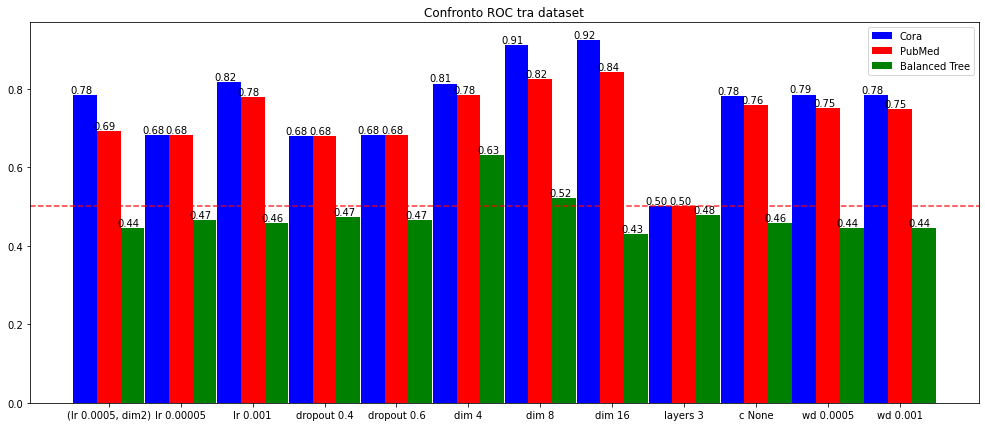

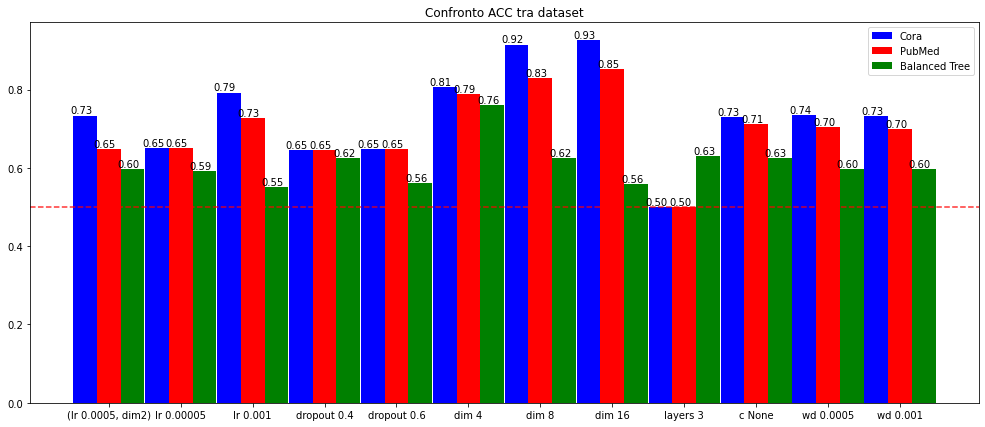

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(stamp))
width = 0.33

plt.figure(figsize=(17, 7))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Confronto ROC tra dataset")

bars1 = plt.bar(x - width, all_test_roc, width, label='Cora', color='blue')
bars2 = plt.bar(x, all_test_roc2, width, label='PubMed', color='red')
bars3 = plt.bar(x + width, all_test_roc3, width, label='Balanced Tree', color='green')

plt.xticks(x, stamp)
plt.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 3,
            height,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.show()

plt.figure(figsize=(17, 7))
plt.axhline(0.5, color='red', linestyle='--', alpha=0.8)
plt.title("Confronto ACC tra dataset")

bars1 = plt.bar(x - width, all_test_ap, width, label='Cora', color='blue')
bars2 = plt.bar(x, all_test_ap2, width, label='PubMed', color='red')
bars3 = plt.bar(x + width, all_test_ap3, width, label='Balanced Tree', color='green')

plt.xticks(x, stamp)
plt.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 3,
            height,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.show()

# File utilizzato per fare "grid search"

In [34]:
import itertools
import subprocess

param_space = {
    "--lr": ["0.0005", "0.00005", "0.001"],
    "--dropout": ["0.2", "0.4", "0.6"],
    "--dim": ["2", "4", "8", "16"],
    "--num-layers": ["2", "3"],
    "--c": ["1.0", "None"],
    "--weight-decay": ["0.0001", "0.0005", "0.001"]
}

current_params = {p: values[0] for p, values in param_space.items()}

fixed = {
    "--task": "lp",
    "--dataset": "disease_lp",
    "--manifold": "PoincareBall",
    "--act": "relu",
    "--cuda": "0",
    "--log-freq": "5",
    "--split-seed": "1234",
    "--optimizer": "RiemannianAdam",
    "--seed": "55",
    "--save": "1"
}

current_params.update(fixed)

for param, values in param_space.items():
    print(f"\n---- Sweeping {param} ----")
    best_value = None
    best_score = -1

    for v in values[1:]:
        test_params = current_params.copy()
        test_params[param] = v
        
        cmd = ["python", "train.py"]
        for i in test_params.keys():
            cmd.append(i)
            cmd.append(test_params[i])
        #subprocess.run(cmd)
        print(cmd)


---- Sweeping --lr ----
['python', 'train.py', '--lr', '0.00005', '--dropout', '0.2', '--dim', '2', '--num-layers', '2', '--c', '1.0', '--weight-decay', '0.0001', '--task', 'lp', '--dataset', 'disease_lp', '--manifold', 'PoincareBall', '--act', 'relu', '--cuda', '0', '--log-freq', '5', '--split-seed', '1234', '--optimizer', 'RiemannianAdam', '--seed', '55', '--save', '1']
['python', 'train.py', '--lr', '0.001', '--dropout', '0.2', '--dim', '2', '--num-layers', '2', '--c', '1.0', '--weight-decay', '0.0001', '--task', 'lp', '--dataset', 'disease_lp', '--manifold', 'PoincareBall', '--act', 'relu', '--cuda', '0', '--log-freq', '5', '--split-seed', '1234', '--optimizer', 'RiemannianAdam', '--seed', '55', '--save', '1']

---- Sweeping --dropout ----
['python', 'train.py', '--lr', '0.0005', '--dropout', '0.4', '--dim', '2', '--num-layers', '2', '--c', '1.0', '--weight-decay', '0.0001', '--task', 'lp', '--dataset', 'disease_lp', '--manifold', 'PoincareBall', '--act', 'relu', '--cuda', '0', '-